<a href="https://colab.research.google.com/github/gmxavier/FAT0413150/blob/main/notebooks/03.03-Blending-Process-Revisited.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Blending Process Revisited (from Seborg 4<sup>th</sup> ed. p. 18)

In [2]:
from sympy import *

In [8]:
t, rho = symbols('t, \\rho')
V   = Function('V')
w_1 = Function('w_1')
w_2 = Function('w_2')
w   = Function('w')
x_1 = Function('x_1')
x_2 = Function('x_2')
x   = Function('x')

Equation 2-12

In [30]:
rhodV_dt = Eq(rho*Derivative(V(t), t), w_1(t) + w_2(t) - w(t))
rhodV_dt

Eq(\rho*Derivative(V(t), t), -w(t) + w_1(t) + w_2(t))

Equation 2-17

In [31]:
dV_dt = Eq(Derivative(V(t), t), solve(rhodV_dt, Derivative(V(t), t))[0])
dV_dt

Eq(Derivative(V(t), t), (-w(t) + w_1(t) + w_2(t))/\rho)

Equation 2-15

In [42]:
rhodVx_dt = Eq(rho*Derivative(V(t)*x(t), t), w_1(t)*x_1(t) + w_2(t)*x_2(t) - w(t)*x(t)).simplify()
rhodVx_dt

Eq(-w(t)*x(t) + w_1(t)*x_1(t) + w_2(t)*x_2(t), \rho*(V(t)*Derivative(x(t), t) + x(t)*Derivative(V(t), t)))

Equation 2-16

In [48]:
# if dV(t)/dt = 0, V(t) = Vbar
V_bar = symbols(r'\bar{V}')
Vrhodx_dt = rhodVx_dt.subs({Derivative(V(t), t): 0, V(t): V_bar})
Vrhodx_dt

Eq(-w(t)*x(t) + w_1(t)*x_1(t) + w_2(t)*x_2(t), \bar{V}*\rho*Derivative(x(t), t))

In [49]:
dx_dt = Eq(Derivative(x(t), t), solve(Vrhodx_dt, Derivative(x(t), t))[0])
dx_dt

Eq(Derivative(x(t), t), (-w(t)*x(t) + w_1(t)*x_1(t) + w_2(t)*x_2(t))/(\bar{V}*\rho))

Equation 2-18

In [52]:
dx_dt = dx_dt.subs({w(t): w_1(t)+w_2(t)}).simplify()
dx_dt

Eq(Derivative(x(t), t), (-(w_1(t) + w_2(t))*x(t) + w_1(t)*x_1(t) + w_2(t)*x_2(t))/(\bar{V}*\rho))

EXAMPLE 2.1 (from Seborg 4<sup>th</sup> ed. p. 18)

Let's solve letter (a).

In [69]:
dx_dt_a = dx_dt.subs({w_1(t): 500, w_2(t): 200, x_1(t): 0.4, x_2(t): 0.75, V_bar: 2, rho: 900})
dx_dt_a

Eq(Derivative(x(t), t), 0.194444444444444 - 7*x(t)/18)

In [75]:
x_0 = dx_dt_a.subs({Derivative(x(t), t): 0})
x_0

Eq(0, 0.194444444444444 - 7*x(t)/18)

In [76]:
solve(x_0, x(t))[0]

0.500000000000000

Let's solve letter (b).

In [109]:
dx_dt_b = dx_dt.subs({w_1(t): 400, w_2(t): 200, x_1(t): 0.4, x_2(t): 0.75, V_bar: 2, rho: 900})
ics = {x(0): 0.5}
dx_dt_b

Eq(Derivative(x(t), t), 0.172222222222222 - x(t)/3)

In [110]:
xsoln = dsolve(dx_dt_b, ics=ics)
print('Solution is', xsoln)

Solution is Eq(x(t), 0.516666666666667 - 0.0166666666666667*exp(-0.333333333333333*t))


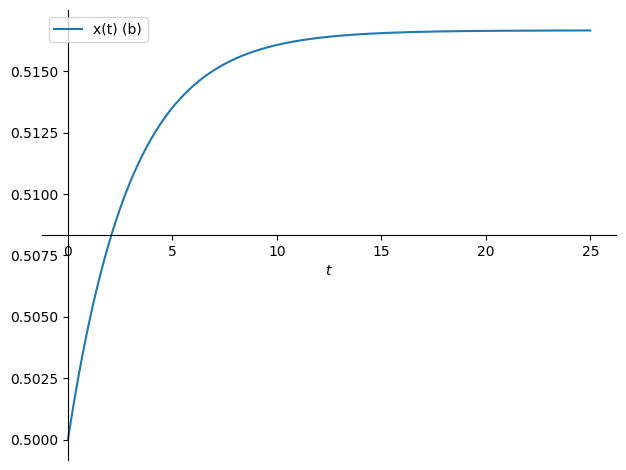

In [111]:
pb = plot(solve(xsoln, x(t))[0], (t, 0, 25), show=False, label='x(t) (b)', legend=True, ylabel='')
pb.show()

Let's solve letter (c).

In [112]:
dx_dt_c = dx_dt.subs({w_1(t): 500, w_2(t): 100, x_1(t): 0.4, x_2(t): 0.75, V_bar: 2, rho: 900})
ics = {x(0): 0.5}
dx_dt_c

Eq(Derivative(x(t), t), 0.152777777777778 - x(t)/3)

In [113]:
xsoln = dsolve(dx_dt_c, ics=ics)
print('Solution is', xsoln)

Solution is Eq(x(t), 0.458333333333333 + 0.0416666666666667*exp(-0.333333333333333*t))


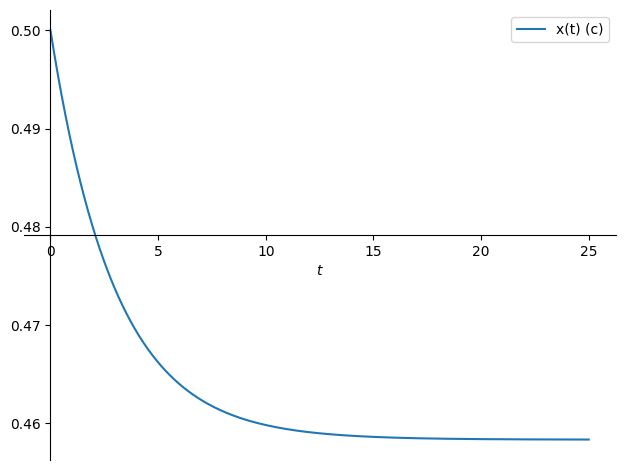

In [114]:
pc = plot(solve(xsoln, x(t))[0], (t, 0, 25), show=False, label='x(t) (c)', legend=True, ylabel='')
pc.show()

Let's solve letter (d).

In [115]:
dx_dt_d = dx_dt.subs({w_1(t): 500, w_2(t): 100, x_1(t): 0.6, x_2(t): 0.75, V_bar: 2, rho: 900})
ics = {x(0): 0.5}
dx_dt_d

Eq(Derivative(x(t), t), 0.208333333333333 - x(t)/3)

In [116]:
xsoln = dsolve(dx_dt_d, ics=ics)
print('Solution is', xsoln)

Solution is Eq(x(t), 0.625 - 0.125*exp(-0.333333333333333*t))


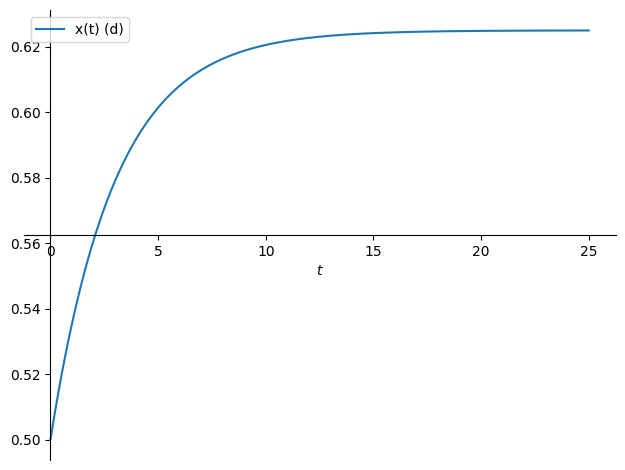

In [117]:
pd = plot(solve(xsoln, x(t))[0], (t, 0, 25), show=False, label='x(t) (d)', legend=True, ylabel='')
pd.show()

Figure 2.2

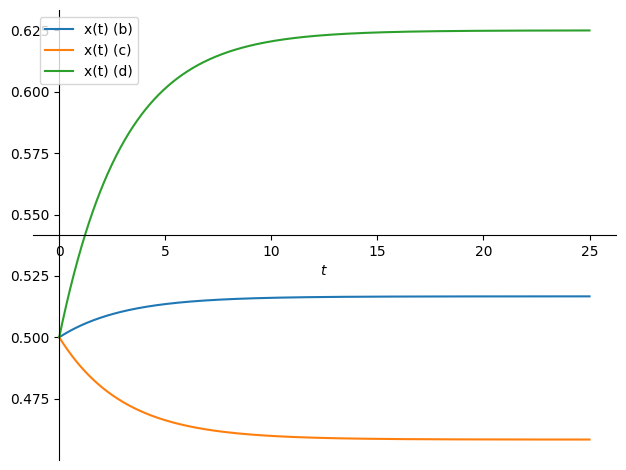

In [118]:
pb.append(pc[0])
pb.append(pd[0])
pb.show()